In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk

In [2]:
data =pd.read_csv('spam.tsv', sep='\t')

In [3]:
data.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [5]:
data_spam=data[data.label=='spam']
data_ham=data[data.label=='ham']

In [10]:
data_ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [14]:
data.isnull().sum()

label      0
message    0
dtype: int64

In [15]:
data.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [18]:
data['label'].value_counts()/len(data)

0    0.865937
1    0.134063
Name: label, dtype: float64

### Balancing the dataset

In [23]:
data_ham.head()
data_spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [27]:
# check the shape of data
data_ham.shape, data_spam.shape

((4825, 4), (747, 4))

In [28]:
# To balance the data select 747 records from ham also 

In [29]:
ham = data_ham.sample(data_spam.shape[0])

In [30]:
ham.shape

(747, 4)

In [34]:
spam = data_spam

In [35]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [38]:
# Appending spam data into ham data
data = ham.append(spam, ignore_index = True)

C:\Users\user\AppData\Local\Temp\ipykernel_18740\252358892.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = ham.append(spam, ignore_index = True)


In [40]:
data.head()

,label,message,length,punct
0,ham,You see the requirements please,31,0
1,ham,Just woke up. Yeesh its late. But I didn't fal...,74,10
2,ham,"SHIT BABE.. THASA BIT MESSED UP.YEH, SHE SHUDV...",116,10
3,ham,Erutupalam thandiyachu,22,0
4,ham,Oh ok..,7,2


In [41]:
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


In [42]:
data.shape

(1494, 4)

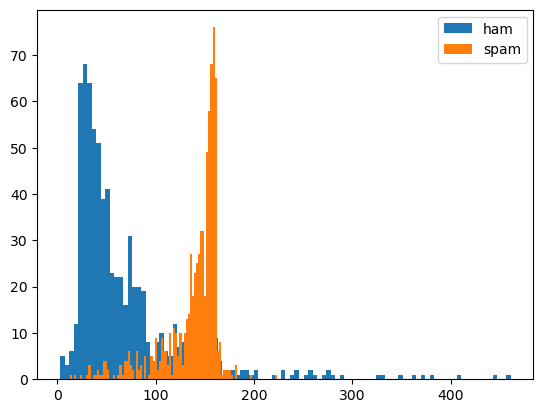

In [47]:
# plot histogram of length for ham and spam both
labels = ['ham', 'spam']
plt.hist(data[data['label']=='ham']['length'], bins=100)
plt.hist(data[data['label']=='spam']['length'], bins=100)
plt.legend(labels)
plt.show()

## Splitting the data into training and testing sets

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size = 0.2,
                                                    random_state=42, shuffle =True)

In [50]:
x_train

532     Pls give her prometazine syrup. 5mls then  &lt...
534     Ok lor... Sony ericsson salesman... I ask shuh...
1108    Hello darling how are you today? I would love ...
490              If I die I want u to have all my stuffs.
933     Reply with your name and address and YOU WILL ...
                              ...                        
1130    December only! Had your mobile 11mths+? You ar...
1294    Loans for any purpose even if you have Bad Cre...
860     You have an important customer service announc...
1459    URGENT! Your Mobile number has been awarded wi...
1126    How come it takes so little time for a child w...
Name: message, Length: 1195, dtype: object

In [51]:
y_train

532      ham
534      ham
1108    spam
490      ham
933     spam
        ... 
1130    spam
1294    spam
860     spam
1459    spam
1126    spam
Name: label, Length: 1195, dtype: object

## Buildng the model (Logistic Regression)

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
# to create bag of words we use tf-idf

In [81]:
# Importing logistic regression
from sklearn.linear_model import LogisticRegression

In [82]:
classifier = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', LogisticRegression(max_iter=100))])

In [83]:
classifier.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

## Predicting the result (Logistic Regression)

In [84]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [85]:
y_pred = classifier.predict(x_test)

In [86]:
accuracy_score(y_test, y_pred)

0.9464882943143813

In [87]:
#Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[142,   3],
       [ 13, 141]], dtype=int64)

In [88]:
# Classification Matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.98      0.95       145
        spam       0.98      0.92      0.95       154

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299



## Building the model (Naive-Bayes)

In [89]:
from sklearn.naive_bayes import BernoulliNB

In [90]:
classifier_NB = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', BernoulliNB())])

In [91]:
classifier_NB.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', BernoulliNB())])

## Predict the result (Naive-Bayes)

In [92]:
y_predNB = classifier.predict(x_test)

In [93]:
accuracy_score(y_test, y_predNB)

0.9464882943143813

In [94]:
print(classification_report(y_test, y_predNB))

              precision    recall  f1-score   support

         ham       0.92      0.98      0.95       145
        spam       0.98      0.92      0.95       154

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299

